<a href="https://colab.research.google.com/github/Mrinalkumar1/Credit-Card-Fraud/blob/main/Fraud_detection.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Credit card fraud is when someone uses your credit card or credit account to make a purchase you didn't authorize. This activity can happen in different ways: Fraudsters can also steal your credit card account number, PIN and security code to make unauthorized transactions, without needing your physical credit card.

It is something which has been happening for a very long time. Hence it's 
important that the credit card companies find out the fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

Dataset Reference : https://www.kaggle.com/mlg-ulb/creditcardfraud

This dataset 'creditcard.csv' was made in 2013 for the European credit card holder. It contains records for all the transactions that happened in the period of 2 days. It contains 284,807 rows and 31 columns. It is a highly unbalanced dataset since the fraud transactions are less than 0.01%

Due to security purposes PCA has been performed on this dataset to maintain the privacy.

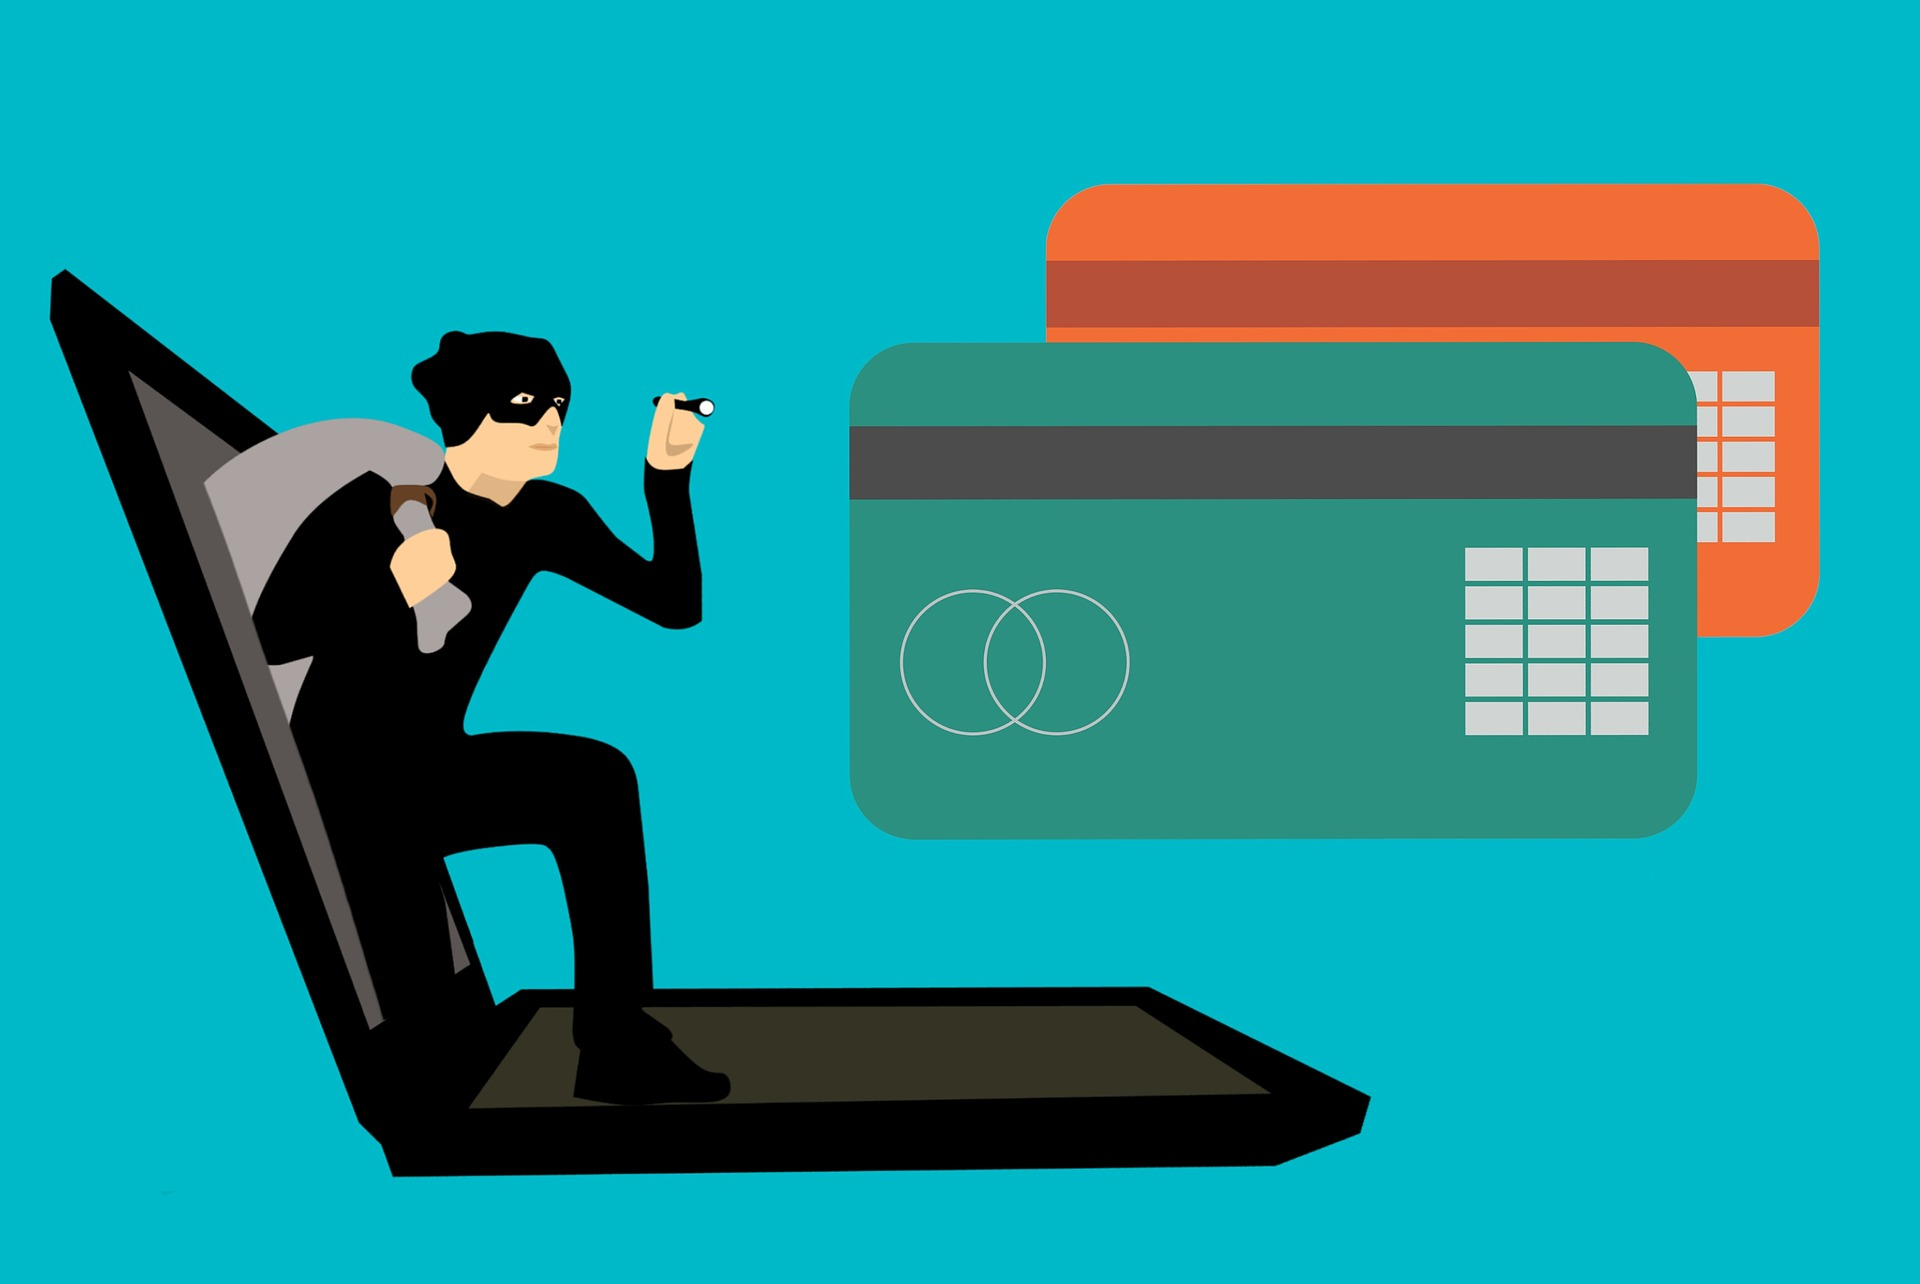

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
data = '/content/drive/MyDrive/ML Projects /Credit card fraud detection/creditcard.csv'
df = pd.read_csv(data)

In [4]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
df.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

**Checking if dataset is balanced**

In [7]:
df['Class'].value_counts()

0    284315
1       492
Name: Class, dtype: int64

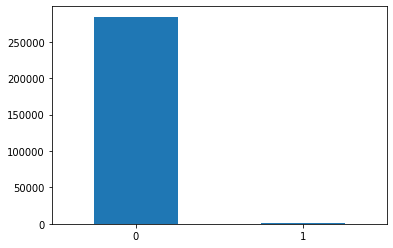

In [8]:
df['Class'].value_counts().plot.bar(rot=0)
plt.show()

In [9]:
fraud = df[df['Class']==1]
normal = df[df['Class']==0]
print("Fraud transactions:{}".format(fraud.shape))
print("Normal transactions:{}".format(normal.shape))

Fraud transactions:(492, 31)
Normal transactions:(284315, 31)


As our dataset is not balanced at all and this can lead to incorrect predictions. 

In [10]:
fraud['Amount'].describe()

count     492.000000
mean      122.211321
std       256.683288
min         0.000000
25%         1.000000
50%         9.250000
75%       105.890000
max      2125.870000
Name: Amount, dtype: float64

In [11]:
normal['Amount'].describe()

count    284315.000000
mean         88.291022
std         250.105092
min           0.000000
25%           5.650000
50%          22.000000
75%          77.050000
max       25691.160000
Name: Amount, dtype: float64

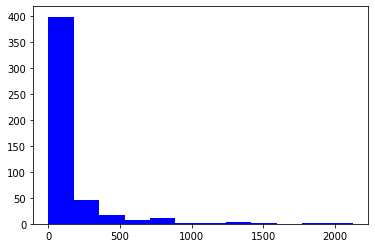

In [12]:
plt.hist(fraud['Amount'], bins=12, color='b')
plt.show()

Most of the fraud transactions were under 200$

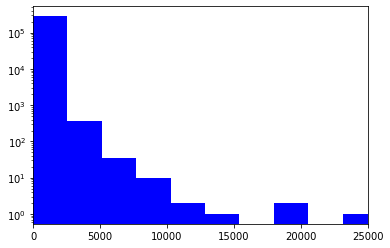

In [13]:
plt.hist(normal['Amount'], bins=10, color='b')
plt.xlim(0,25000)
plt.yscale('log')
plt.show()

**Checking Outliers**

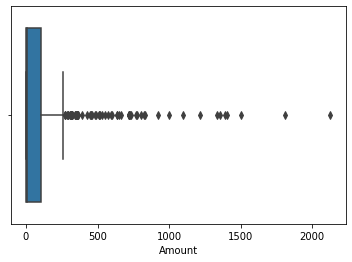

In [14]:
sns.boxplot(fraud['Amount'])
plt.show()

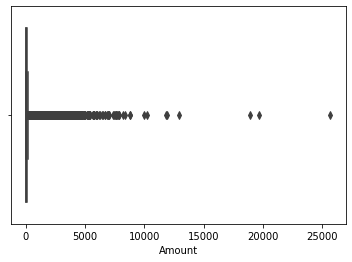

In [15]:
sns.boxplot(normal['Amount'])
plt.show()

Since the number of outliers are way too many hence, we need to keep them for our prediction model

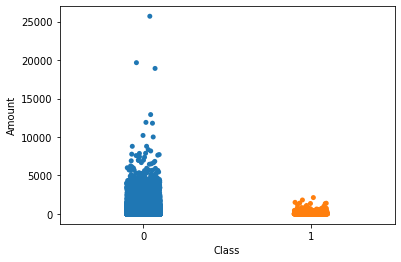

In [16]:
sns.stripplot(data=df, x=df['Class'], y=df['Amount'])
plt.show()

This plot shows us that there were only few instance where the normal transaction exceeded $10000.



Also the fraud transactions were never over $5000

**Scatter plot to check if the fraud transactions occured more during a certain period of time.**

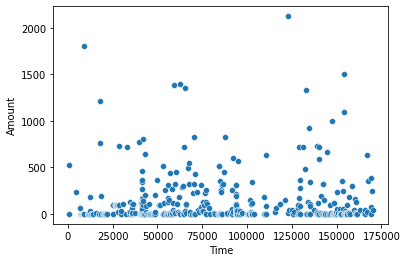

In [17]:
sns.scatterplot(data=df, x=fraud['Time'], y=fraud['Amount'])
plt.show()

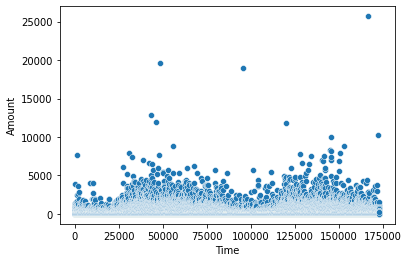

In [18]:
sns.scatterplot(data=df, x=normal['Time'], y=normal['Amount'])
plt.show()

Heatmap to check the correlation between class and independent features

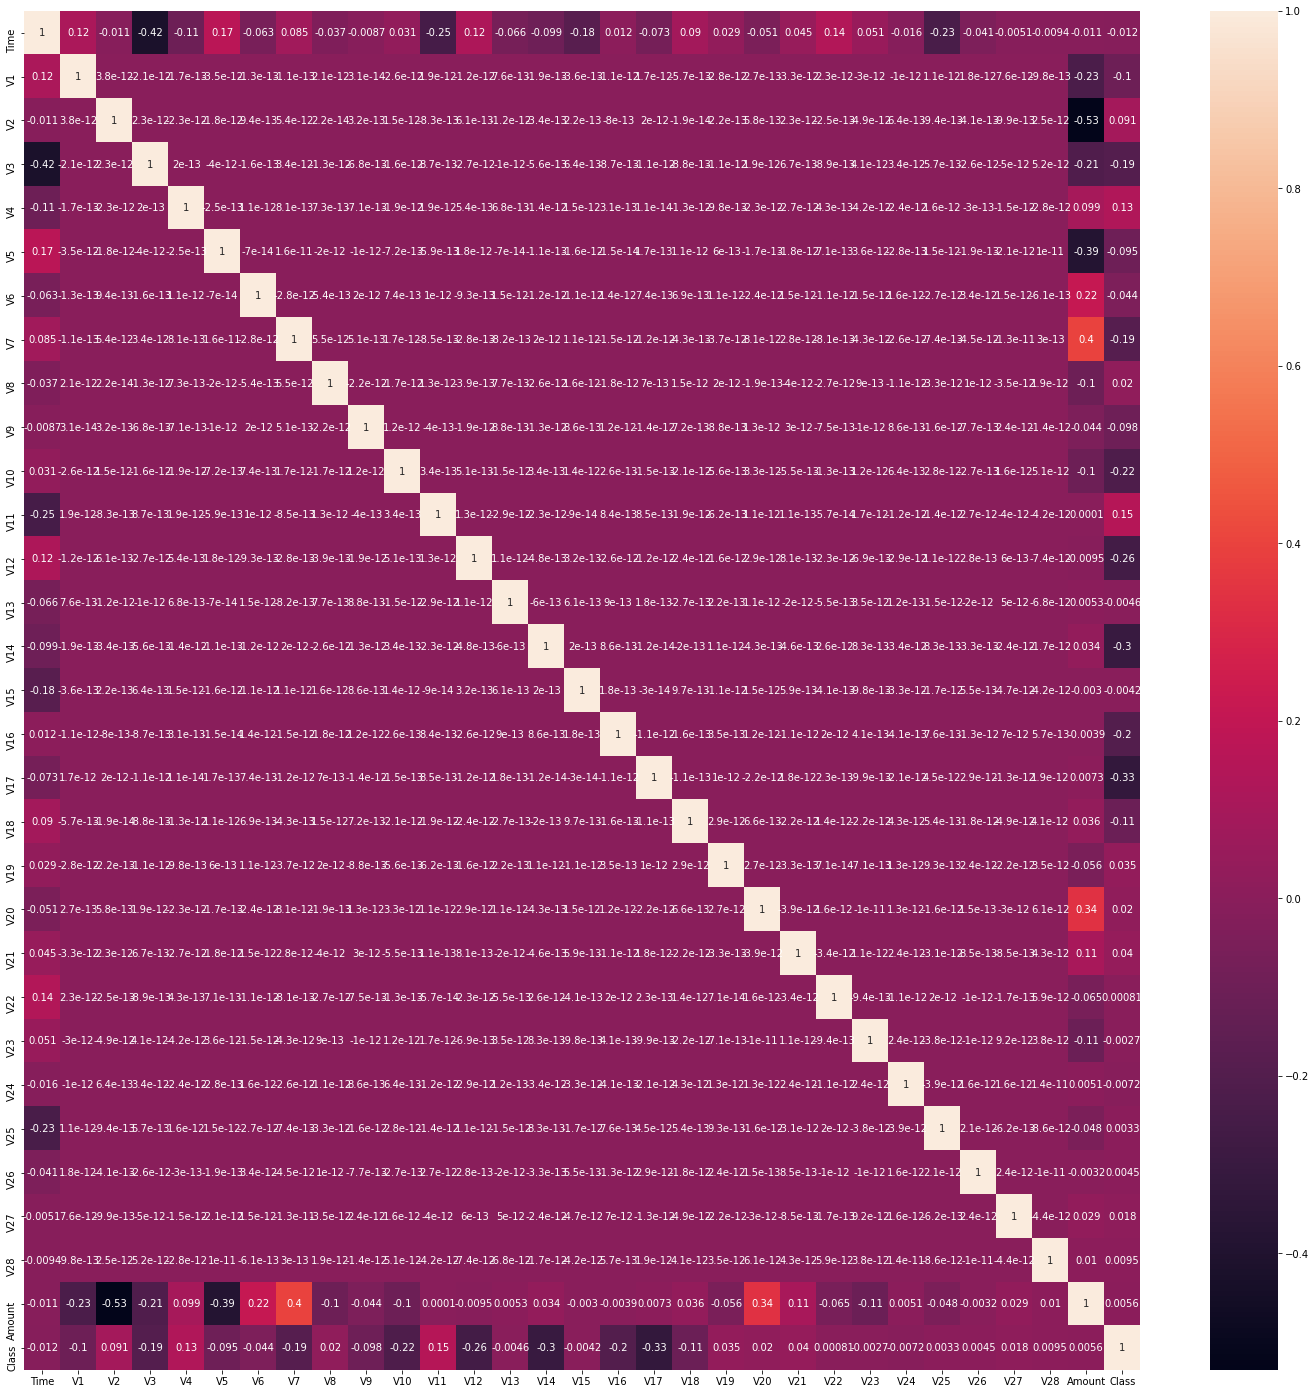

In [19]:
plt.figure(figsize=(25,25))
sns.heatmap(df.corr(), annot=True)
plt.show()

This heatmap tells us that there are few features which makes the transaction a fraud or normal. And since we don't know the names of the columns we can definitely use feature selection or Random Forest. 

Time


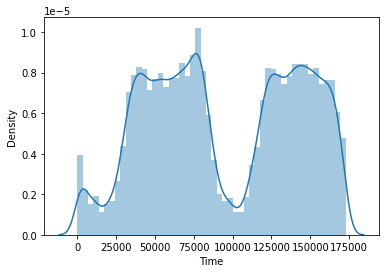

V1


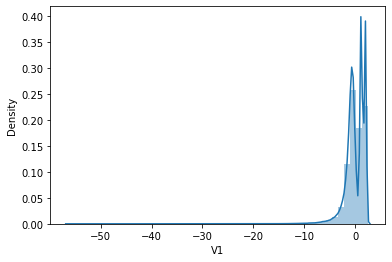

V2


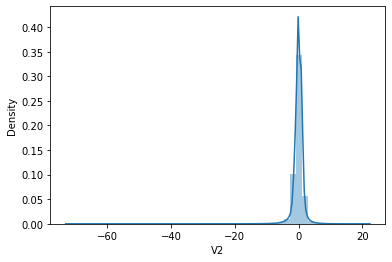

V3


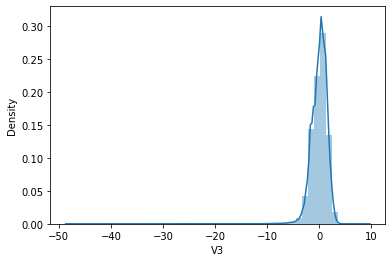

V4


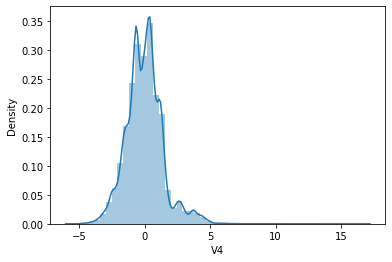

V5


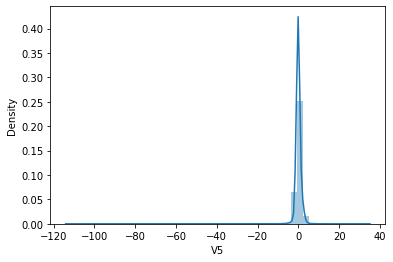

V6


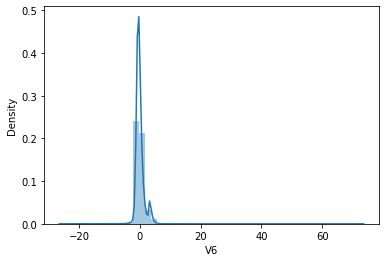

V7


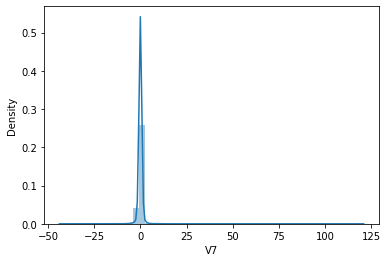

V8


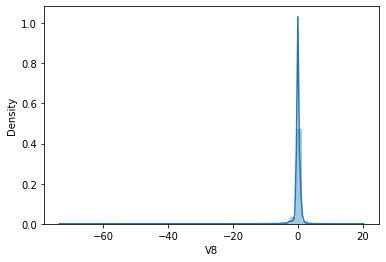

V9


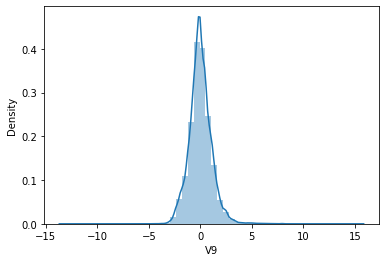

V10


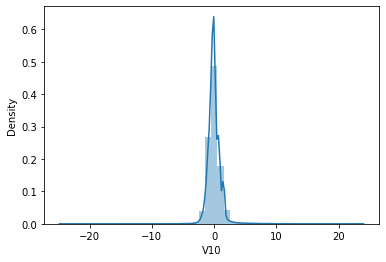

V11


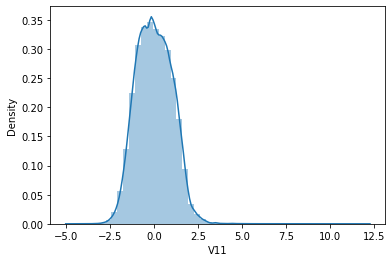

V12


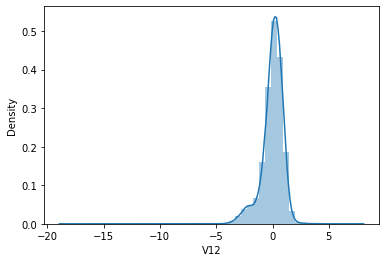

V13


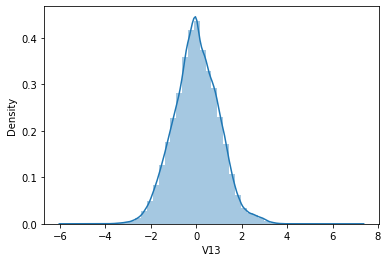

V14


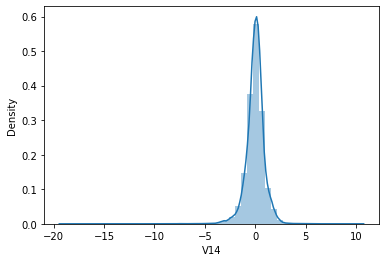

V15


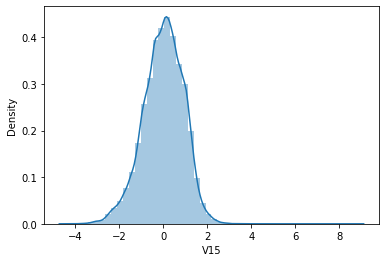

V16


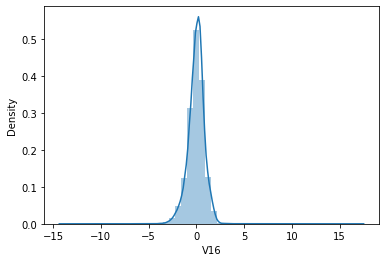

V17


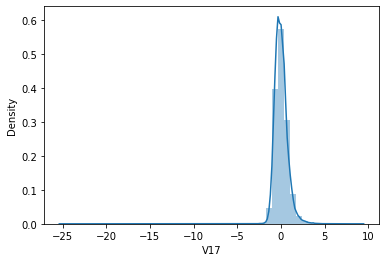

V18


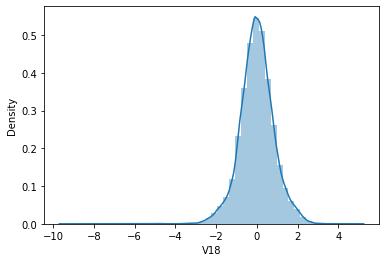

V19


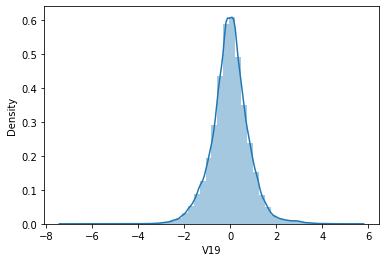

V20


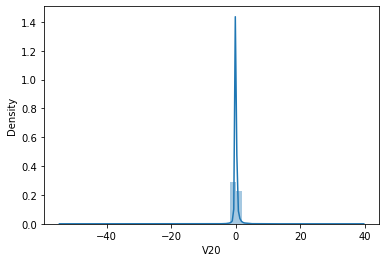

V21


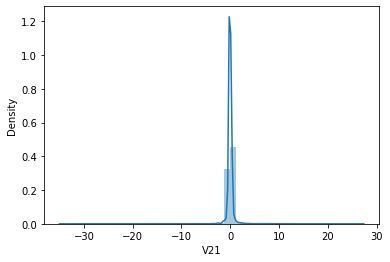

V22


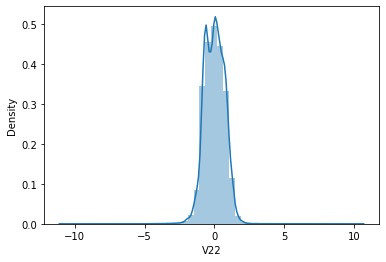

V23


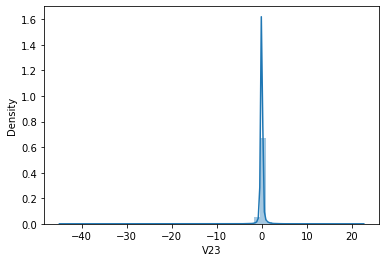

V24


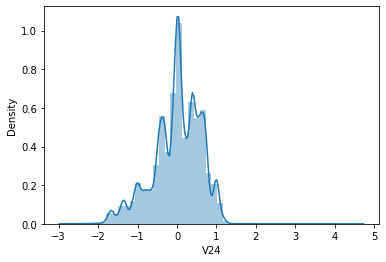

V25


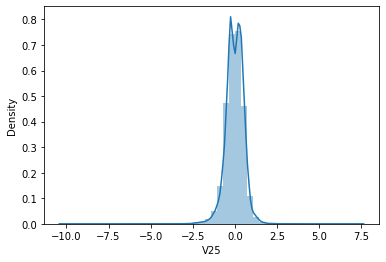

V26


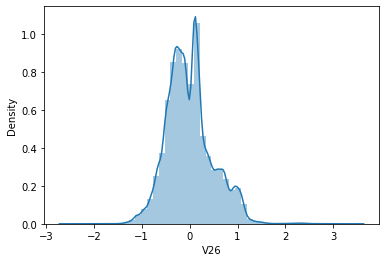

V27


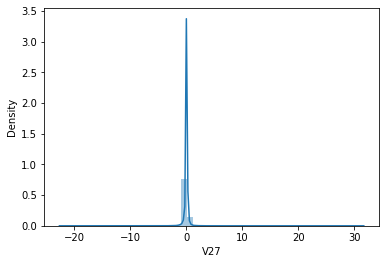

V28


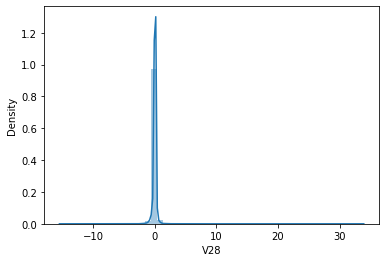

Amount


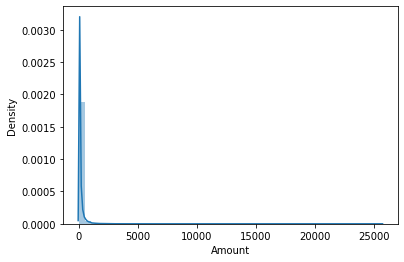

Class


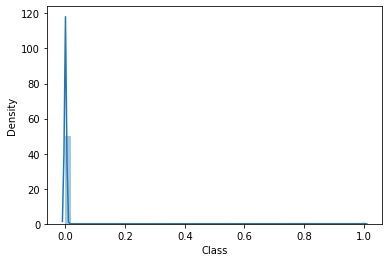

In [20]:
for col in df:
    print(col)
    sns.distplot(df[col])
    plt.show()

**Balancing the dataset : Under Sampling**

In [21]:
from imblearn.under_sampling import NearMiss #Library for under sampling

In [22]:
x = df.drop('Class', axis=1)
y = df['Class']

In [23]:
#Under sampling

nm = NearMiss(random_state=5)
x_under, y_under = nm.fit_sample(x, y)
print("Number of records before under sampling: {}".format(len(y)))
print("Number of records after under sampling: {}".format(len(y_under)))

Number of records before under sampling: 284807
Number of records after under sampling: 984


**Modelling with Undersampled Data**

In [24]:
from sklearn.metrics import  accuracy_score, classification_report, confusion_matrix, roc_curve, roc_auc_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [25]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.25)
logr.fit(x_train, y_train)

y_predict_under = logr.predict(x_test)
accuracy_score(y_test, y_predict_under)

0.975609756097561

In [26]:
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_under)
print("Confusion Matrix for logistic regression")
print(tp, fp)
print(fn, tn)

Confusion Matrix for logistic regression
125 4
2 115


In [27]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_predict_under))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.98      0.97      0.98       129
           1       0.97      0.98      0.97       117

    accuracy                           0.98       246
   macro avg       0.98      0.98      0.98       246
weighted avg       0.98      0.98      0.98       246



Roc-auc score: 0.9759491154839992


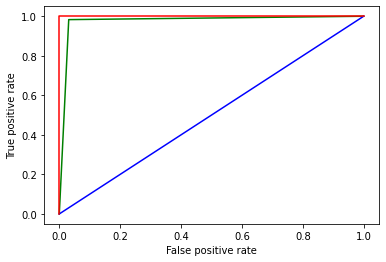

In [28]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_under)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_under))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [29]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)
y_predict_dtr = dtr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_dtr))

Accuracy score: 0.959349593495935


In [30]:
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_dtr)
print("Confusion matrix for Decision Tree")
print(tp, fp)
print(fn, tn)

Confusion matrix for Decision Tree
124 5
5 112


In [31]:
print("Decision Tree Classification Report")
print(classification_report(y_test, y_predict_dtr))

Decision Tree Classification Report
              precision    recall  f1-score   support

           0       0.96      0.96      0.96       129
           1       0.96      0.96      0.96       117

    accuracy                           0.96       246
   macro avg       0.96      0.96      0.96       246
weighted avg       0.96      0.96      0.96       246



Roc-auc score: 0.9592526336712384


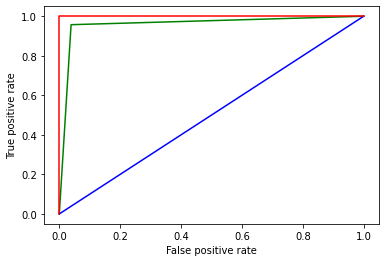

In [32]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_dtr)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_dtr))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [33]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x_under, y_under, test_size=0.25)
rfc.fit(x_train, y_train)
y_predict_rfc = rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_rfc))

Accuracy score: 0.9715447154471545


In [34]:
print("Random forest classifier confusion matrix")
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_rfc)
print(tp, fp)
print(fn, tn)

Random forest classifier confusion matrix
120 0
7 119


Roc-auc score: 0.9722222222222222


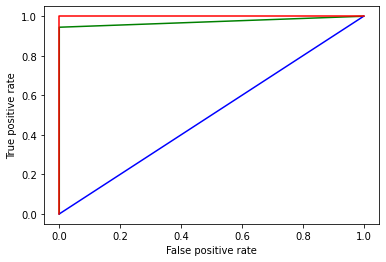

In [35]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_rfc)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_rfc))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

**Modelling with Oversampled Data**

In [36]:
from imblearn.over_sampling import RandomOverSampler

In [37]:
#Over sampling

ros = RandomOverSampler(ratio=1)
x_over, y_over = ros.fit_sample(x, y)
print("Number of records before over sampling: {}".format(len(y)))
print("Number of records after over sampling: {}".format(len(y_over)))

Number of records before over sampling: 284807
Number of records after over sampling: 568630


In [38]:
logr = LogisticRegression()

x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25)
logr.fit(x_train, y_train)
y_predict_over = logr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_over))

Accuracy score: 0.9400666863630608


In [39]:
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_over)
print("Confusion matrix for Logistic Regression")
print(tp, fp)
print(fn, tn)

Confusion matrix for Logistic Regression
68285 2758
5762 65353


In [40]:
print("Logistic Regression Classification Report")
print(classification_report(y_test, y_predict_over))

Logistic Regression Classification Report
              precision    recall  f1-score   support

           0       0.92      0.96      0.94     71043
           1       0.96      0.92      0.94     71115

    accuracy                           0.94    142158
   macro avg       0.94      0.94      0.94    142158
weighted avg       0.94      0.94      0.94    142158



Roc-auc score: 0.9400773736045015


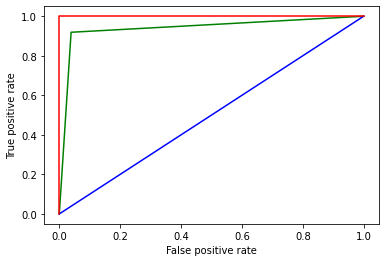

In [41]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_over)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_over))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [42]:
from sklearn.tree import DecisionTreeClassifier

dtr = DecisionTreeClassifier()
dtr.fit(x_train, y_train)
y_predict_dtr = dtr.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_dtr))

Accuracy score: 0.9996834508082556


In [43]:
print("Confusion Matrix Decision Tree")
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_dtr)
print(tp, fp)
print(fn, tn)

Confusion Matrix Decision Tree
70998 45
0 71115


In [44]:
print("Classification Report Decision Tree\n")
print(classification_report(y_test, y_predict_dtr))

Classification Report Decision Tree

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71043
           1       1.00      1.00      1.00     71115

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Roc-auc score: 0.9996832904015878


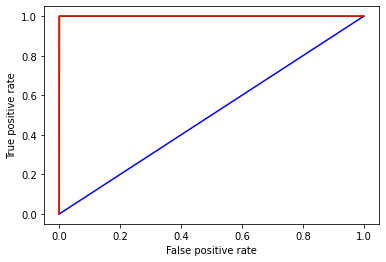

In [45]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_dtr)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_dtr))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [46]:
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25)
rfc.fit(x_train, y_train)
y_predict_rfc = rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_rfc))

Accuracy score: 0.9999437245881343


In [47]:
print("Confusion Matrix Random Forest Classifier")
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_rfc)
print(tp, fp)
print(fn, tn)

Confusion Matrix Random Forest Classifier
71262 8
0 70888


In [48]:
print("Random Forest Classifier Classification Report")
print(classification_report(y_test, y_predict_rfc))

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71270
           1       1.00      1.00      1.00     70888

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Roc-auc score: 0.9999438754033955


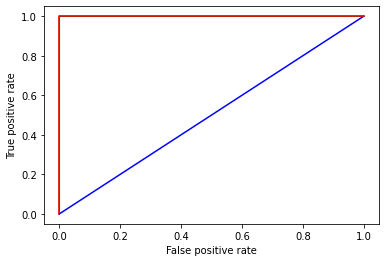

In [49]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_rfc)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_rfc))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

In [50]:
data = '/content/drive/MyDrive/ML Projects /Credit card fraud detection/creditcard.csv'
df1 = pd.read_csv(data)

x = df1.drop('Class', axis=1)
y = df1['Class']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25)
rfc = RandomForestClassifier()
rfc.fit(x_train, y_train)
y_predict_rfc_normal = rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_rfc_normal))

Accuracy score: 0.9995365298727564


In [51]:
print(classification_report(y_test, y_predict_rfc_normal))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71081
           1       0.92      0.80      0.85       121

    accuracy                           1.00     71202
   macro avg       0.96      0.90      0.93     71202
weighted avg       1.00      1.00      1.00     71202



In [52]:
print("Confusion Matrix Random Forest Classifier")
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_rfc_normal)
print(tp, fp)
print(fn, tn)

Confusion Matrix Random Forest Classifier
71072 9
24 97


Roc-auc score: 0.9007631382239863


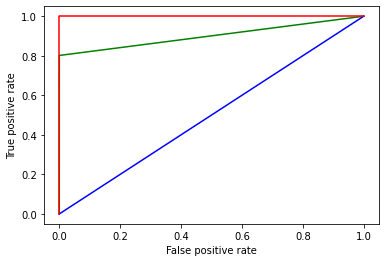

In [53]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_rfc_normal)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_rfc_normal))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

**Final Model : RandomForestClassifer with OverSampling**

Oversampling the data seems to increase the accuracy by a significant amount and the error is almost negligible. 

In [54]:
x = df.drop('Class', axis=1)
y = df['Class']

In [55]:
from sklearn.ensemble import RandomForestClassifier

ros = RandomOverSampler(ratio=1)
x_over, y_over = ros.fit_sample(x, y)

rfc = RandomForestClassifier()
x_train, x_test, y_train, y_test = train_test_split(x_over, y_over, test_size=0.25)
rfc.fit(x_train, y_train)
y_predict_rfc = rfc.predict(x_test)
print("Accuracy score:",accuracy_score(y_test, y_predict_rfc))

Accuracy score: 0.9999577934411007


In [56]:
print("Confusion Matrix Random Forest Classifier")
(tp, fp), (fn, tn) = confusion_matrix(y_test, y_predict_rfc)
print(tp, fp)
print(fn, tn)

Confusion Matrix Random Forest Classifier
71307 6
0 70845


In [57]:
print("Random Forest Classifier Classification Report")
print(classification_report(y_test, y_predict_rfc))

Random Forest Classifier Classification Report
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     71313
           1       1.00      1.00      1.00     70845

    accuracy                           1.00    142158
   macro avg       1.00      1.00      1.00    142158
weighted avg       1.00      1.00      1.00    142158



Roc-auc score: 0.9999579319338691


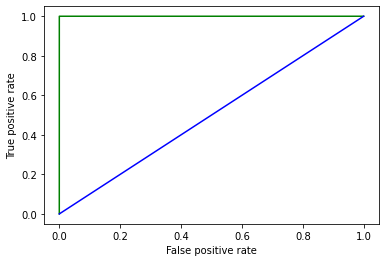

In [60]:
fpr, tpr, thresh = roc_curve(y_test, y_predict_rfc)
print("Roc-auc score:",roc_auc_score(y_test, y_predict_rfc))
plt.plot(fpr, tpr, 'g-')
plt.plot([0,1],[0,1],'b-')
#plt.plot([0,0,1],[0,1,1],'r-')
plt.xlabel("False positive rate")
plt.ylabel("True positive rate")
plt.show()

Hence it is a perfect model to go with. It has low bias as well as low variance. The classification report speaks highly of it and the roc curve seems to be perfect. 


In [62]:
output_df = pd.DataFrame(y_test, columns=['Class'])
output_df['Predicted Class'] = y_predict_rfc
output_df.head(10)

,Class,Predicted Class
0,1,1
1,0,0
2,0,0
3,0,0
4,0,0
5,0,0
6,1,1
7,0,0
8,1,1
9,1,1


In [63]:
output_df.to_csv('Output.csv')